In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- Load Data ---
df = pd.read_csv("StudentPerformance.csv")

In [3]:
# --- Data Cleaning ---
# Fill missing categorical with mode
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\pcc\AppData\Local\Temp\ipykernel_12616\3266963837.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [4]:
# Encode Yes/No to 1/0
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
df['Internet_Access'] = df['Internet_Access'].map({'Yes': 1, 'No': 0})
df['Learning_Disabilities'] = df['Learning_Disabilities'].map({'Yes': 1, 'No': 0})

In [5]:
# --- 1. Summary Stats ---
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Hours_Studied   Attendance  Extracurricular_Activities  Sleep_Hours  \
count    6607.000000  6607.000000                 6607.000000   6607.00000   
mean       19.975329    79.977448                    0.596035      7.02906   
std         5.990594    11.547475                    0.490728      1.46812   
min         1.000000    60.000000                    0.000000      4.00000   
25%        16.000000    70.000000                    0.000000      6.00000   
50%        20.000000    80.000000                    1.000000      7.00000   
75%        24.000000    90.000000                    1.000000      8.00000   
max        44.000000   100.000000                    1.000000     10.00000   

       Previous_Scores  Internet_Access  Tutoring_Sessions  Physical_Activity  \
count      6607.000000      6607.000000        6607.000000        6607.000000   
mean         75.070531         0.924474           1.493719           2.967610   
std          14.399784         0

In [6]:
# --- 2. Correlation with Exam Score ---
correlation = df.corr(numeric_only=True)['Exam_Score'].sort_values(ascending=False)
print("\nCorrelation with Exam Score:\n", correlation)


Correlation with Exam Score:
 Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Tutoring_Sessions             0.156525
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Physical_Activity             0.027824
Sleep_Hours                  -0.017022
Learning_Disabilities        -0.085066
Name: Exam_Score, dtype: float64


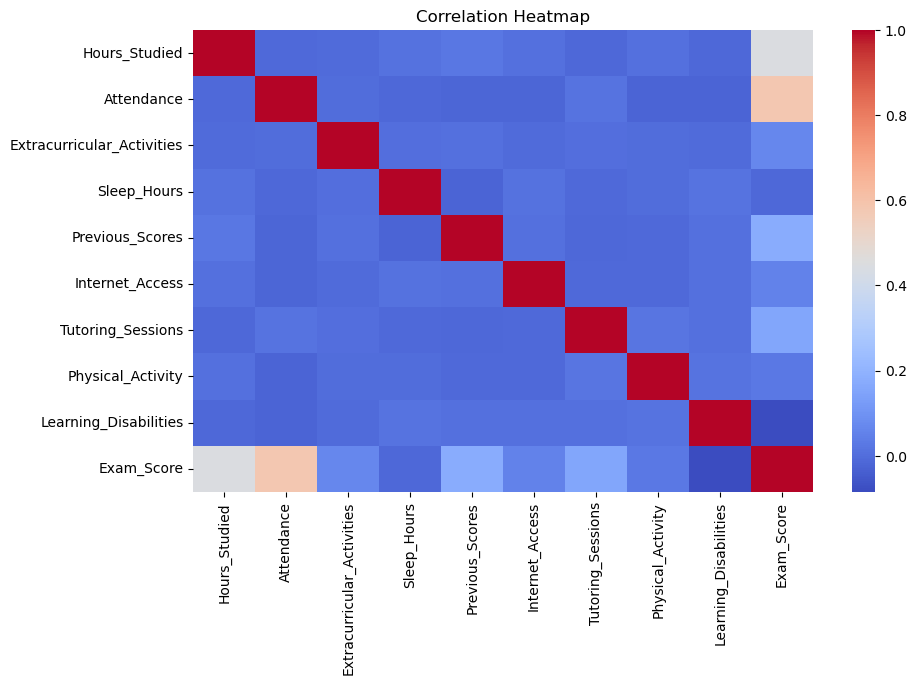

In [7]:
# Heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# --- 3. Grouped Averages ---
categorical_cols = [
    "Parental_Involvement", "Family_Income", "Teacher_Quality", "School_Type",
    "Peer_Influence", "Parental_Education_Level", "Distance_from_Home", "Gender"
]

In [9]:
for col in categorical_cols:
    means = df.groupby(col)["Exam_Score"].mean().sort_values(ascending=False)
    print(f"\nAverage Exam Score by {col}:\n", means)


Average Exam Score by Parental_Involvement:
 Parental_Involvement
High      68.092767
Medium    67.098156
Low       66.358265
Name: Exam_Score, dtype: float64

Average Exam Score by Family_Income:
 Family_Income
High      67.842396
Medium    67.334959
Low       66.848428
Name: Exam_Score, dtype: float64

Average Exam Score by Teacher_Quality:
 Teacher_Quality
High      67.676939
Medium    67.100175
Low       66.753425
Name: Exam_Score, dtype: float64

Average Exam Score by School_Type:
 School_Type
Private    67.287705
Public     67.212919
Name: Exam_Score, dtype: float64

Average Exam Score by Peer_Influence:
 Peer_Influence
Positive    67.623199
Neutral     67.197917
Negative    66.564270
Name: Exam_Score, dtype: float64

Average Exam Score by Parental_Education_Level:
 Parental_Education_Level
Postgraduate    67.970881
College         67.315737
High School     66.897978
Name: Exam_Score, dtype: float64

Average Exam Score by Distance_from_Home:
 Distance_from_Home
Near        67.49

C:\Users\pcc\AppData\Local\Temp\ipykernel_12616\1434803507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=means.index, y=means.values, palette="viridis")


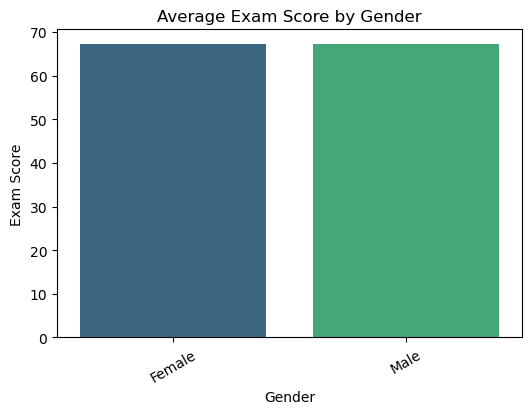

In [10]:
    # Bar chart
    plt.figure(figsize=(6,4))
    sns.barplot(x=means.index, y=means.values, palette="viridis")
    plt.title(f"Average Exam Score by {col}")
    plt.ylabel("Exam Score")
    plt.xticks(rotation=30)
    plt.show()


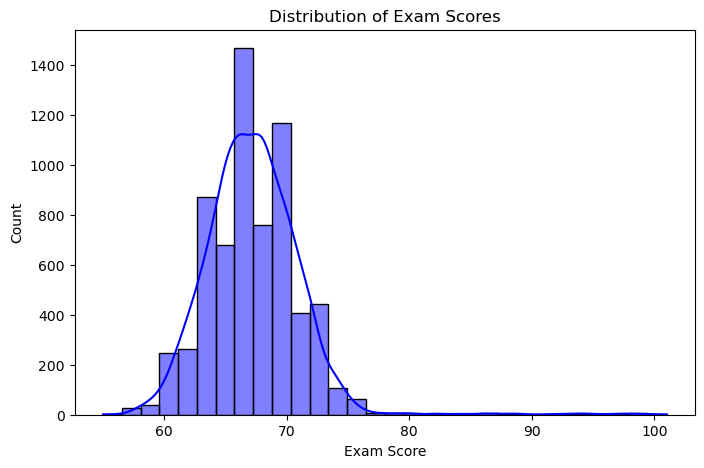

In [11]:
# --- 4. Distribution of Exam Scores ---
plt.figure(figsize=(8,5))
sns.histplot(df["Exam_Score"], bins=30, kde=True, color="blue")
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()